In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df= pd.read_csv('Titanic-Dataset.csv')
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S


In [5]:
print(df.isna().sum(), '\n')
print(f'duplicate rows: {df.duplicated().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

duplicate rows: 0


In [6]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df['Age']= df['Age'].fillna(df['Age'].mean())
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
530,1,2,female,2.000000,1,1,26.0000
790,0,3,male,29.699118,0,0,7.7500
48,0,3,male,29.699118,2,0,21.6792
787,0,3,male,8.000000,4,1,29.1250
699,0,3,male,42.000000,0,0,7.6500


In [7]:
pd.DataFrame({
	'Frequency':  df['Survived'].value_counts(),
	'Percentage': df['Survived'].value_counts(normalize=True),
})

,Frequency,Percentage
Survived,,
0,549,0.616162
1,342,0.383838


In [8]:
pd.DataFrame({
	'Frequency':  df['Pclass'].value_counts(),
	'Percentage': df['Pclass'].value_counts(normalize=True),
}).sort_values(by='Pclass')

,Frequency,Percentage
Pclass,,
1,216,0.242424
2,184,0.206510
3,491,0.551066


In [9]:
pd.DataFrame({
	'Frequency':  df['Sex'].value_counts(),
	'Percentage': df['Sex'].value_counts(normalize=True),
})

,Frequency,Percentage
Sex,,
male,577,0.647587
female,314,0.352413


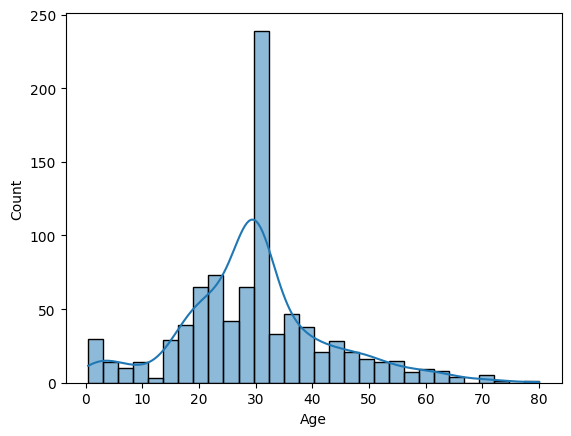

In [10]:
sns.histplot(df, x='Age', kde=True)
plt.show()

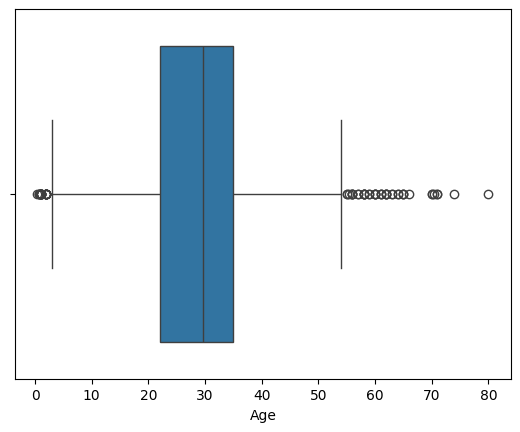

In [11]:
sns.boxplot(df, x='Age')
plt.show()

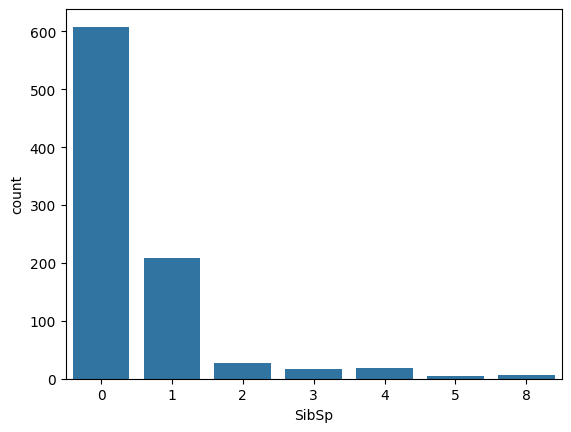

In [12]:
sns.countplot(df, x='SibSp')
plt.show()

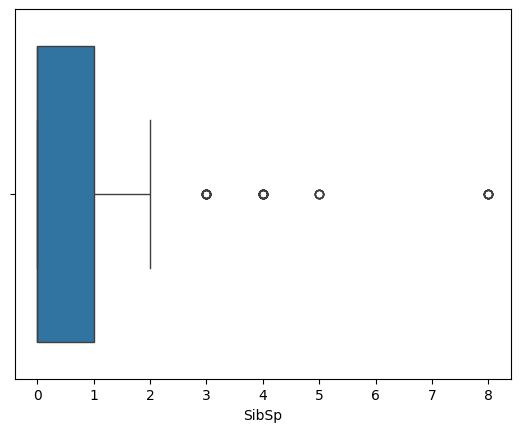

In [13]:
sns.boxplot(df, x='SibSp')
plt.show()

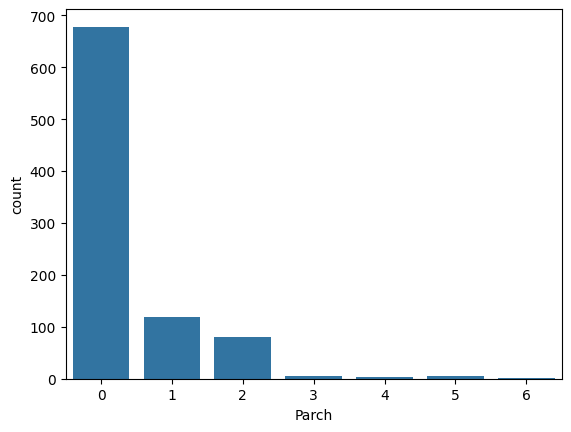

In [14]:
sns.countplot(df, x='Parch')
plt.show()

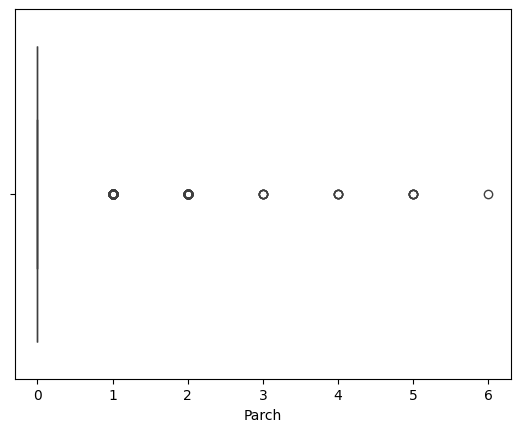

In [15]:
sns.boxplot(df, x='Parch')
plt.show()

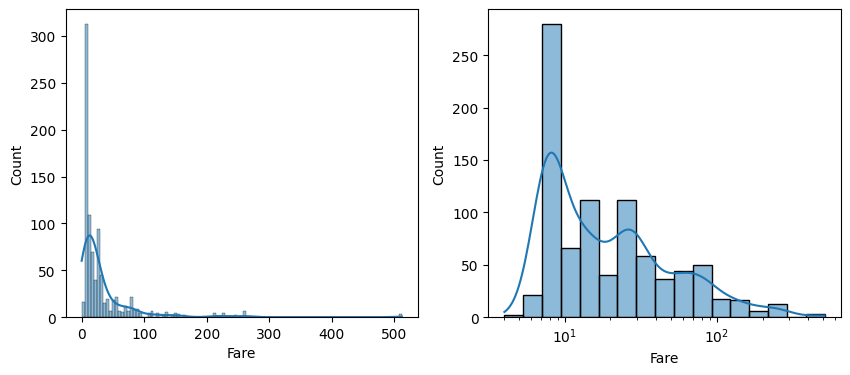

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.histplot(df, x='Fare', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df[df['Fare']>0], x='Fare', kde=True, log_scale=10)
plt.show()

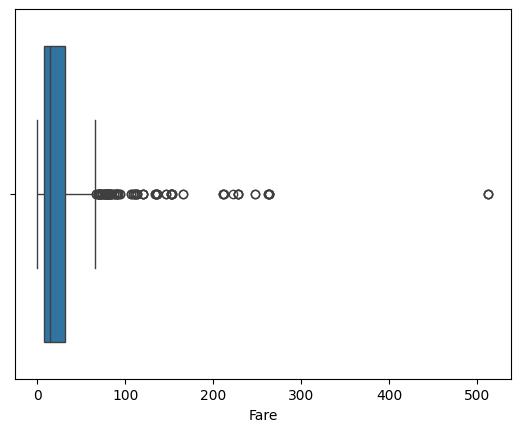

In [17]:
sns.boxplot(df, x='Fare')
plt.show()

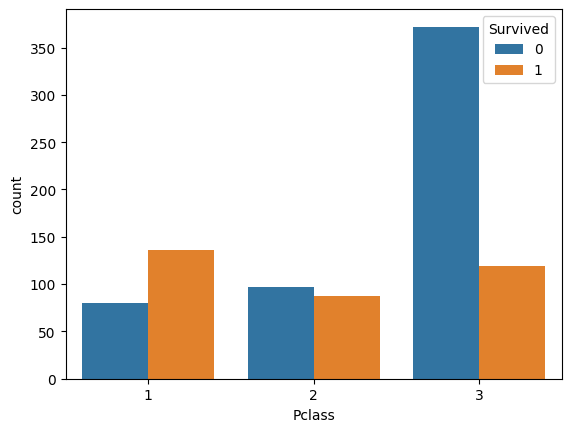

In [18]:
sns.countplot(df, x='Pclass', hue='Survived')
plt.show()

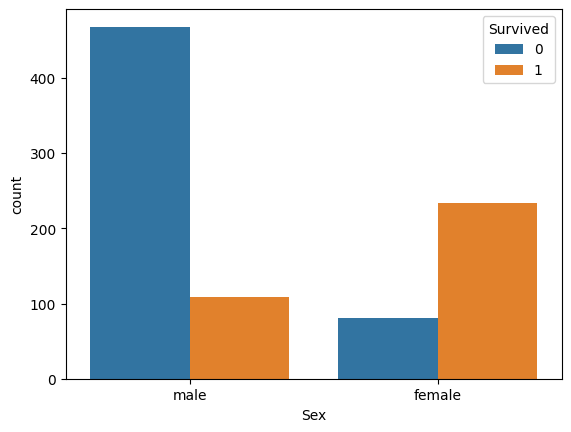

In [19]:
sns.countplot(df, x='Sex', hue='Survived')
plt.show()

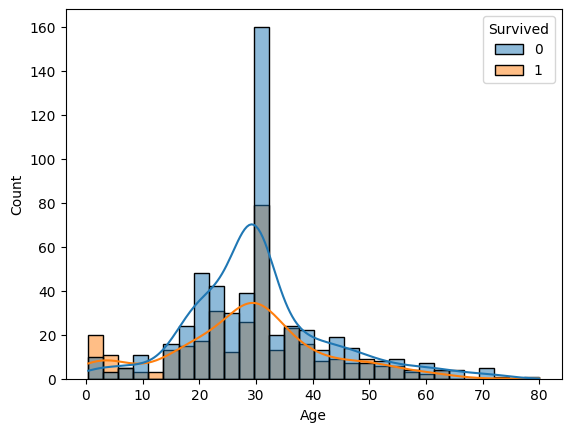

In [20]:
sns.histplot(df, x='Age', hue='Survived', kde=True)
plt.show()

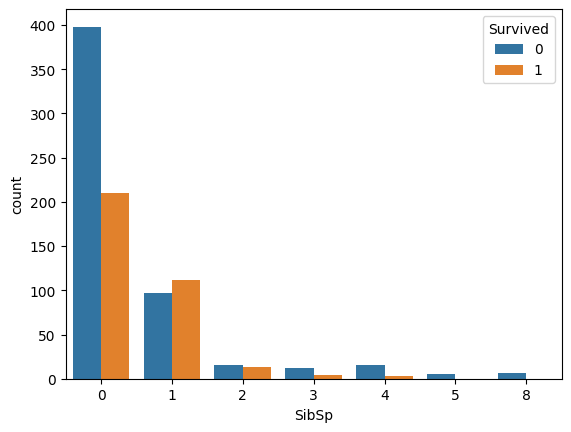

In [21]:
sns.countplot(df, x='SibSp', hue='Survived')
plt.show()

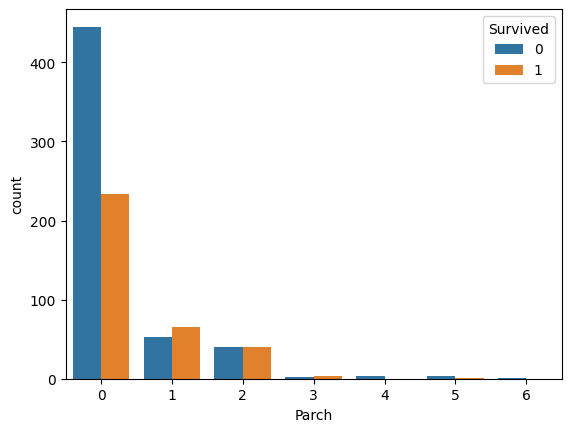

In [22]:
sns.countplot(df, x='Parch', hue='Survived')
plt.show()

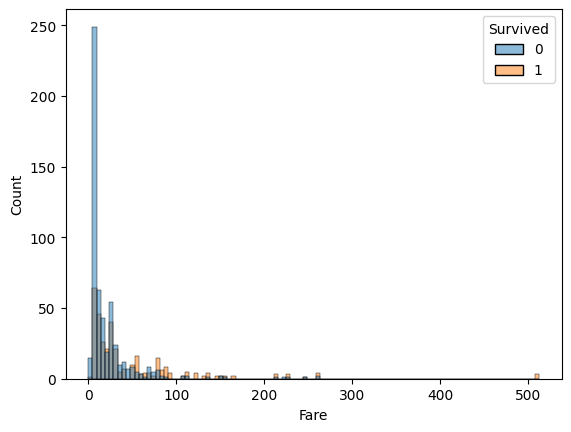

In [23]:
sns.histplot(df, x='Fare', hue='Survived')
plt.show()

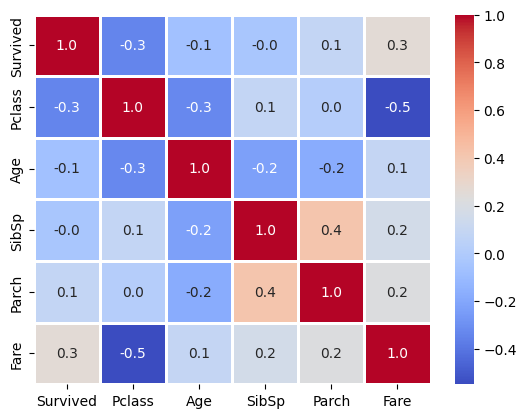

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2)
plt.show()

In [25]:
def preprocess(df):
	encoder= LabelEncoder()
	df['Sex']= encoder.fit_transform(df['Sex'])
	df.drop(inplace=True, columns=['Fare'])
	del(encoder)

In [26]:
df_train, df_test= train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

preprocess(df_train)
X_train= df_train.drop(['Survived'], axis=1)
y_train= df_train.loc[:, 'Survived']

preprocess(df_test)
X_test= df_test.drop(['Survived'], axis=1)
y_test= df_test.loc[:, 'Survived']

print(f'Train Size: {df_train.shape}, Test Size: {df_test.shape}')

Train Size: (712, 6), Test Size: (179, 6)


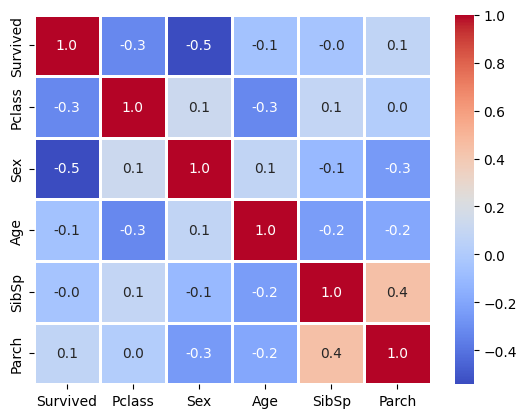

In [27]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2)
plt.show()

Accuracy: 0.8268156424581006
Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



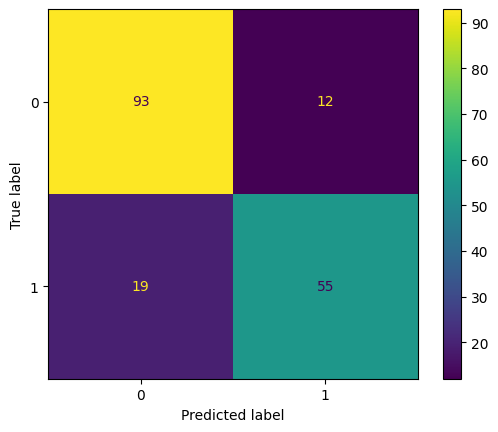

In [28]:
model= LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(f'Accuracy: {model.score(X_test, y_test)}')
print(f'Report:\n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()